# sistemas Hamiltonianos

Gerardo y pablo estan excribiendo un libro, ellos llegan cada mañana con diferentes ideas, los dos siempre llegan animados y con mucha energia. Pero Gerardo se fustra muy facil y su estado de anímo es dependiente al estado de Pablo, pero Pablo siempre esta animado pero fluctua dependiendo de la cantidad de ideas que tenga. Ellos notaron que el estado de anímo influye en la escritura del libro, así que decidieron crear un sistema que le permita saber el estado de anímo de cada persona.

Ellos definieron las variables $x(t)$ y $y(t)$ que mide el estado  anímo de cada persona en el tiempo $t$, suponiendo que si $x(t)>0$ es por que Gerardo esta anímado, $x(t)=0$ es por es apático y $x(t)<0$ es por que Gerardo esta desanimado.

Además notaron, la tasa de anímo de Gerardo es proporcialnal a la tasa de animo de Pablo, así
$$\frac{dx}{dt}=y$$
Para la tasa de anímo de Pablo, notaron que mientras el animo de Gerardo sea mesurado el de Pablo crece, pero si el estado de anímo de gereardo es mul alto, Pablo se comienza a desanimar y que si Gerardo esta desanimado, Pablo tambien, por último si que los dos estan apaticos en el mismo momento
asi notaron que $$\frac{dy}{dt}=x-x"2$$


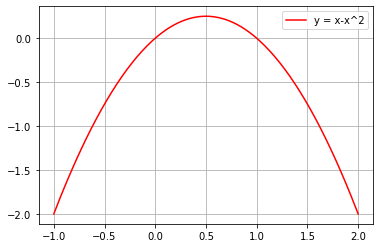

In [63]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 2, 180)
y=x-x**2
plt.plot(x,y,c='r', label="y = x-x^2")
plt.legend()
plt.grid()
plt.show()

De esta forma el sistema para esdudiar el estado de anímo de los autores esta determinado por 
$$\begin{cases}\frac{dx}{dt}&=y\\
\frac{dy}{dt}&=x-x^2\\\end{cases}$$

Note que este sistema tiene dos puntos de equilibrio, $(x,y)=(0,0)$ y $(x,y)=(1,0)$.
Además el jaboniano esta determinado por
$$J(x,y)=\begin{pmatrix}0&1\\1-2x&0\end{pmatrix},$$
así tenemos que
$$J(0,0)=\begin{pmatrix}0&1\\1-x&0\end{pmatrix} \text{ y } J(0,1)=\begin{pmatrix}0&1\\-1&0\end{pmatrix}$$

/tmp/ipykernel_143900/2042371815.py:38: UserWarning: Legend does not support 'G' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax[0].legend("Gerardo", "Pablo")
/tmp/ipykernel_143900/2042371815.py:38: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax[0].legend("Gerardo", "Pablo")
/tmp/ipykernel_143900/2042371815.py:38: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax[0].legend("Gerardo", "Pablo")
/tmp/ipykernel_143900/2042371815.py:38: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: htt

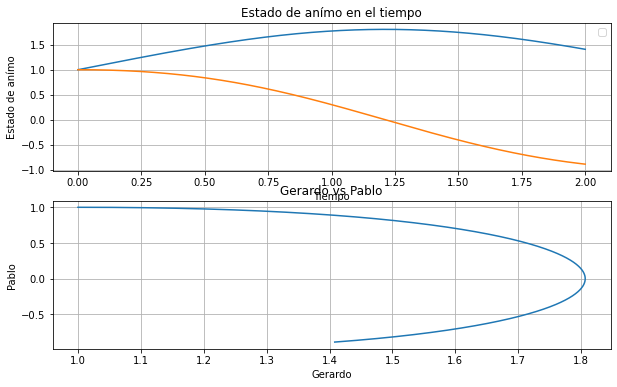

/tmp/ipykernel_143900/2042371815.py:59: RuntimeWarning: invalid value encountered in true_divide
  uu = uu / norm
/tmp/ipykernel_143900/2042371815.py:60: RuntimeWarning: invalid value encountered in true_divide
  vv = vv / norm


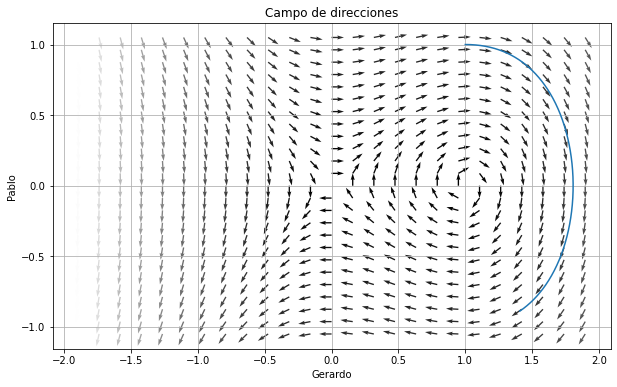

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from IPython.html.widgets import interact 
from IPython.html.widgets import interactive
import random as ra



## definición de la función
def df_dt(x, t):
    ## coexistencia
    dx=x[1]
    dy=x[0]-x[0]**2
    return np.array([dx,dy])



# solucion de la ecuacion via metodos numericos 
# para las condiciones iniciales particular
def sol_particular():
  # Condiciones iniciales
  x0 = 1   # Gerardo
  y0 = 1    # Pablo
  conds_iniciales = np.array([x0, y0])
  tf = 2
  N = 800
  t = np.linspace(0, tf, N)
  X = odeint(df_dt, conds_iniciales, t)
  # grafica de la ecuacion
  fig,ax=plt.subplots(2,1)
  fig.set_size_inches(10,6)
  ax[0].plot(t, X[:, 0], label='Gerardo')
  ax[0].plot(t, X[:, 1], label='Pablo')
  ax[0].set_xlabel('Tiempo')
  ax[0].set_ylabel('Estado de anímo')
  ax[0].legend("Gerardo", "Pablo")
  ax[0].grid()
  ax[0].set_title('Estado de anímo en el tiempo')
  #ax[0].rcParams["figure.figsize"] = (10,10)
  ax[1].plot(X[:, 0],X[:, 1], label='presa')
  ax[1].set_xlabel('Gerardo')
  ax[1].set_ylabel('Pablo')
  ax[1].set_title('Gerardo vs Pablo')
  ax[1].grid()
  #ax[1].rcParams["figure.figsize"] = (10,10)
  plt.show()
  return X
## Campo de pendientes
def campo(X):
  x_max = np.max(X[:,0]) * 1.05
  y_max = np.max(X[:,1]) * 1.05
  x = np.linspace( -x_max, x_max, 25)
  y = np.linspace(-y_max, y_max, 25)
  xx, yy = np.meshgrid(x, y)
  uu, vv = df_dt((xx, yy), 0)
  norm = np.sqrt(uu**2 + vv**2)
  uu = uu / norm
  vv = vv / norm
  plt.figure(figsize=(10,6))
  plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
  plt.xlabel('Gerardo')
  plt.ylabel('Pablo')
  plt.title('Campo de direcciones')
  plt.plot(X[:, 0],X[:, 1])
  plt.grid()
  np.random.seed(5)
X=sol_particular()
campo(X)


# Cantidades que se conservan 
Una función $H(x(t),y(t))$ escalar, es una cantidad conservada si$H$ es constante en el tiempo, es decir,
$$\frac{dH}{dt}=0$$
$$\frac{\partial H}{\partial x}\frac{dx}{dt}+\frac{\partial H}{\partial y}\frac{dy}{dt}=0$$

Tomemos la función $$H(x,y)=\frac{1}{2}y^2-\frac{1}{2}x^2+\frac{1}{3}x^3,$$
note que esta cantidad conservada.

Esto significa que las curvas solución estan en las curvas de nivel de la función $H$, 

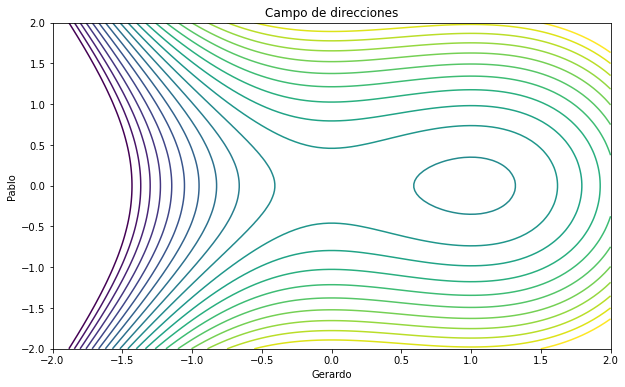

In [65]:
def f(x, y):
    return 0.5*y**2-0.5*x**2+1.0/3.0*x**3
    
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.figure(figsize=(10,6))
plt.contour(X, Y, Z, levels=np.linspace(-2, 2, 20))
plt.xlabel('Gerardo')
plt.ylabel('Pablo')
plt.title('Campo de direcciones')
plt.show()

/tmp/ipykernel_143900/3140611773.py:9: RuntimeWarning: invalid value encountered in true_divide
  uu = uu / norm
/tmp/ipykernel_143900/3140611773.py:10: RuntimeWarning: invalid value encountered in true_divide
  vv = vv / norm


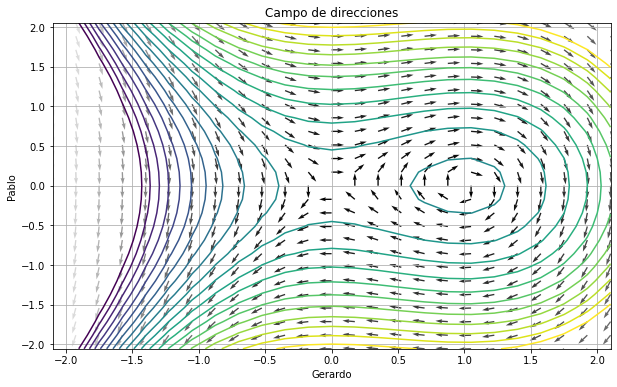

In [66]:
def campo2():
  x_max = np.max(X[:,0]) * 1.05
  y_max = np.max(X[:,1]) * 1.05
  x = np.linspace( -x_max, x_max, 25)
  y = np.linspace(-y_max, y_max, 25)
  xx, yy = np.meshgrid(x, y)
  uu, vv = df_dt((xx, yy), 0)
  norm = np.sqrt(uu**2 + vv**2)
  uu = uu / norm
  vv = vv / norm
  Z = f(xx, yy)
 
  plt.figure(figsize=(10,6))
  plt.contour(xx, yy, Z, levels=np.linspace(-2, 2, 20))
  plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
  plt.xlabel('Gerardo')
  plt.ylabel('Pablo')
  plt.title('Campo de direcciones')
  
  plt.grid()
campo2()

'\nplt.set_xlabel(\'Tiempo\')\nplt.set_ylabel(\'Estado de anímo\')\nplt.legend("Gerardo", "Pablo")\n\nplt.set_title(\'Estado de anímo en el tiempo\')\n'

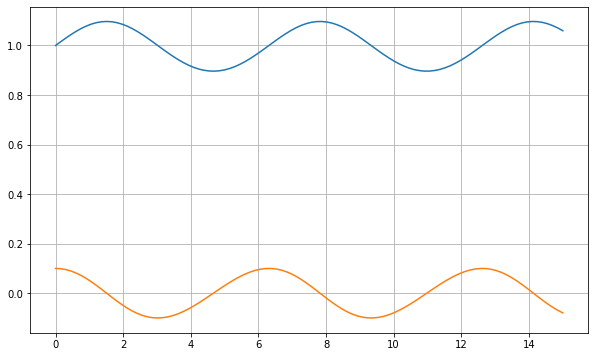

In [67]:
# Condiciones iniciales
x0 = 1.0   # Gerardo
y0 = 0.1    # Pablo
conds_iniciales = np.array([x0, y0])
tf = 15
N = 100
t = np.linspace(0, tf, N)
X = odeint(df_dt, conds_iniciales, t)
# grafica de la ecuacion

plt.figure(figsize=(10,6))
plt.plot(t, X[:, 0], label='Gerardo')
plt.plot(t, X[:, 1], label='Pablo')
plt.grid()
'''
plt.set_xlabel('Tiempo')
plt.set_ylabel('Estado de anímo')
plt.legend("Gerardo", "Pablo")

plt.set_title('Estado de anímo en el tiempo')
'''

## Definición 
Un sistema de ecuaciones diferenciales se llama un sistema hamiltoniano si existe una función real $H(x,y)$ tal que
$$\begin{cases}\frac{dx}{dT}&=\frac{\partial H}{\partial y}\\
\frac{dy}{dt}&=-\frac{\partial H}{\partial X}\end{cases},$$
para todo $x$ y$y$ en el tiempo. La función $H$ se llama la función Hamiltoniana para el sistema. (Note que $H$ es una función escalar, no una función vectorial y es conservada en el tiempo).

# Ejemplo 

Sistema armónico no amortiguado

